### Just a tweak to use sublime shortcuts

In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
# Install tensorflow provided datasets - uncomment on the first run
# !pip install -U tensorflow_datasets

In [3]:
# Necessary imports
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Logging
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Fashion MNIST dataset

The Fashion MNIST dataset comes as a dictionary, with an already performed train and test dataset split. Metadata provide information about the dataset.

In [4]:
# Load dataset and metadata
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

### ModelBuilder class test

In [5]:
# ModelBuilder import
from local import builder as bl

In [6]:
# Train attempt with default parameters
builder = bl.ModelBuilder(dataset=dataset, metadata=metadata)
model = builder.define()
builder.model = model
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6224 - accuracy: 0.7835
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3953 - accuracy: 0.8569
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.8713
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2990 - accuracy: 0.8888


In [7]:
# Model summary
builder.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Model test
evaluation = builder.evaluate()

313/313 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8706


### Two extra hidden layers, all with the same number of neurons

In [9]:
# Empty builder definition
builder = bl.ModelBuilder()

# Modifying default parameters and building model
num_hidden_layers = 3
hidden_layer_neurons = num_hidden_layers*[builder.hidden_layer_neurons]
hidden_layer_activation = num_hidden_layers*[builder.hidden_layer_activation]

builder = bl.ModelBuilder(dataset=dataset, 
                          metadata=metadata, 
                          num_hidden_layers= num_hidden_layers,
                          hidden_layer_neurons = hidden_layer_neurons,
                          hidden_layer_activation = hidden_layer_activation)
model = builder.define()
builder.model = model
builder.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6291 - accuracy: 0.7750
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3808 - accuracy: 0.8596
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3378 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2927 - accuracy: 0.8896


In [11]:
evaluation = builder.evaluate()

313/313 [==============================] - 1s 2ms/step - loss: 0.3700 - accuracy: 0.8660


### Two extra hidden layers, with different number of neurons

In [12]:
# Empty builder definition
builder = bl.ModelBuilder()

# Modifying default parameters and building model
num_hidden_layers = 3
hidden_layer_neurons = [128,64,32]
hidden_layer_activation = num_hidden_layers*[builder.hidden_layer_activation]

builder = bl.ModelBuilder(dataset=dataset, 
                          metadata=metadata, 
                          num_hidden_layers= num_hidden_layers,
                          hidden_layer_neurons = hidden_layer_neurons,
                          hidden_layer_activation = hidden_layer_activation)
model = builder.define()
builder.model = model
builder.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = builder.train()
builder.history = history

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6429 - accuracy: 0.7729
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.8745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8888


In [14]:
evaluation = builder.evaluate()

313/313 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8624


### Model comparison

Train and test of different models for comparison purposes. 
<ul>
    <li> Test1: changing hidden layers number
    <li> Test2: changing hidden layer neurons' number
</ul>

In [16]:
# Test1
epochs = 20
layer_numbers = [1,3,10,20]
hidden_layer_neurons_common = 10
t1_history = []

# Empty builder definition
builder = bl.ModelBuilder()
hidden_layer_activation_common = builder.hidden_layer_activation

# Modifying default parameters and building model
for num_hidden_layers in layer_numbers:
    print(f'Number of hidden layers: {num_hidden_layers}')
    hidden_layer_neurons = num_hidden_layers*[hidden_layer_neurons_common]
    hidden_layer_activation = num_hidden_layers*[hidden_layer_activation_common]
    builder = bl.ModelBuilder(dataset=dataset, 
                              metadata=metadata, 
                              num_hidden_layers= num_hidden_layers,
                              hidden_layer_neurons = hidden_layer_neurons,
                              hidden_layer_activation = hidden_layer_activation,
                              epochs = epochs, 
                              verbose=0)
    model = builder.define()
    builder.model = model
    history = builder.train()
    t1_history.append(history.history['accuracy'])

Number of hidden layers: 1
Number of hidden layers: 3
Number of hidden layers: 10
Number of hidden layers: 20


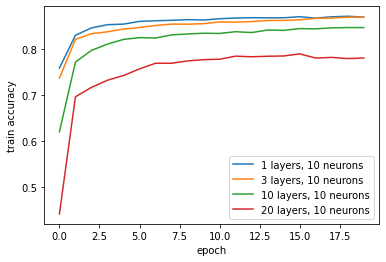

In [17]:
for i in range(len(t1_history)):
    plt.plot(t1_history[i],label=f'{layer_numbers[i]} layers, 10 neurons')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.show()   

In [23]:
# Test2
epochs = 20
num_hidden_layers = 10
hidden_layer_neurons_common = [10,20,50,100]
t2_history = []

# Empty builder definition
builder = bl.ModelBuilder()
hidden_layer_activation_common = builder.hidden_layer_activation

# Modifying default parameters and building model
for num_neurons in hidden_layer_neurons_common:
    print(f'Number of neurons: {num_neurons}')
    hidden_layer_neurons = num_hidden_layers*[num_neurons]
    hidden_layer_activation = num_hidden_layers*[hidden_layer_activation_common]
    builder = bl.ModelBuilder(dataset=dataset, 
                              metadata=metadata, 
                              num_hidden_layers= num_hidden_layers,
                              hidden_layer_neurons = hidden_layer_neurons,
                              hidden_layer_activation = hidden_layer_activation,
                              epochs = epochs,
                              verbose=0)
    model = builder.define()
    builder.model = model
    history = builder.train()
    t2_history.append(history.history['accuracy'])

Number of neurons: 10
Number of neurons: 20
Number of neurons: 50
Number of neurons: 100


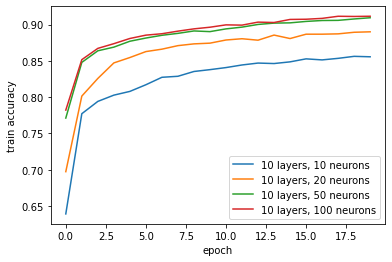

In [24]:
for i in range(len(t2_history)):
    plt.plot(t2_history[i],label=f'10 layers, {hidden_layer_neurons_common[i]} neurons')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('train accuracy')
plt.show()  